In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
 


In [38]:
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
        'RAD','TAX','PTRATIO','B','LSTAT','MEDV']
 
data = pd.read_csv("data/housing/housing.data",
                   sep=' +', engine='python', header=None, 
                   names=cols)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


<AxesSubplot:xlabel='CHAS', ylabel='MEDV'>

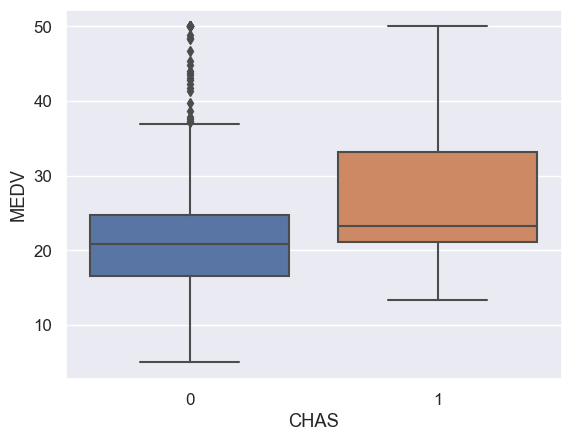

In [39]:
#sns.barplot(x=data['CHAS'], y=data['MEDV'])

sns.boxplot(x=data['CHAS'], y=data['MEDV'])

<AxesSubplot:>

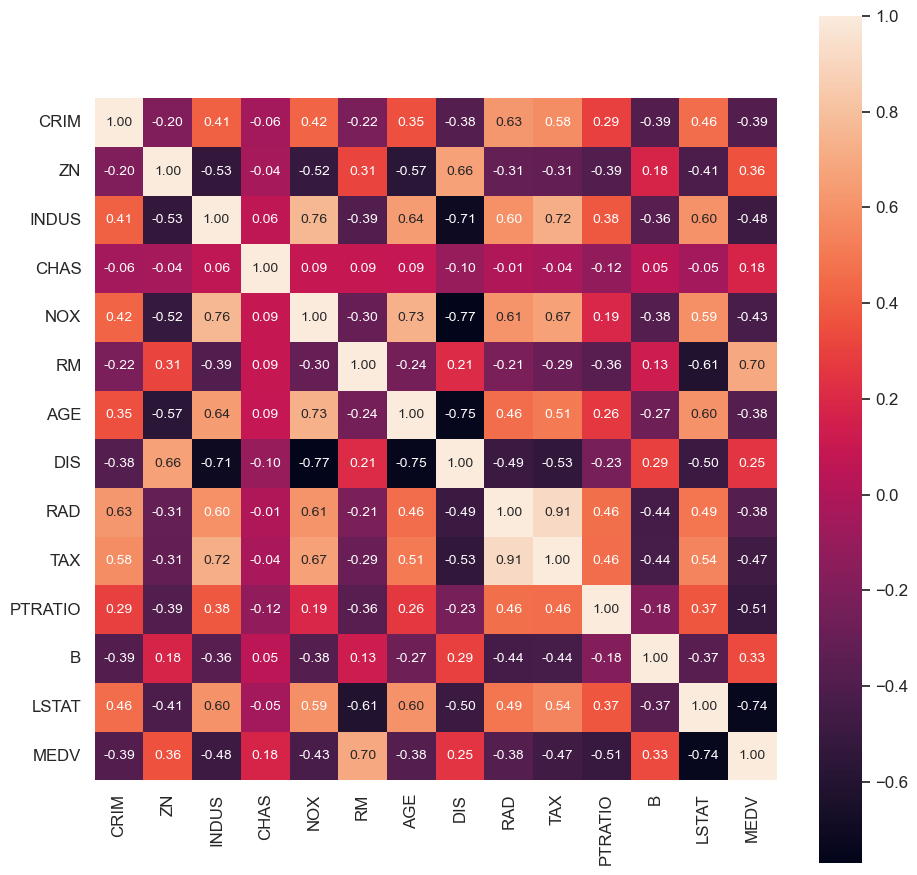

In [40]:
corr_matrix = np.corrcoef(data.values.T)

fig, axs = plt.subplots(figsize = (11,11))
sns.set(font_scale=1.1)
sns.heatmap(
        data = corr_matrix,
        square = True,
        cbar = True,
        annot = True,
        fmt = '.2f',
        annot_kws = { 'size' : 10},
        xticklabels = data.columns,
        yticklabels = data.columns
)

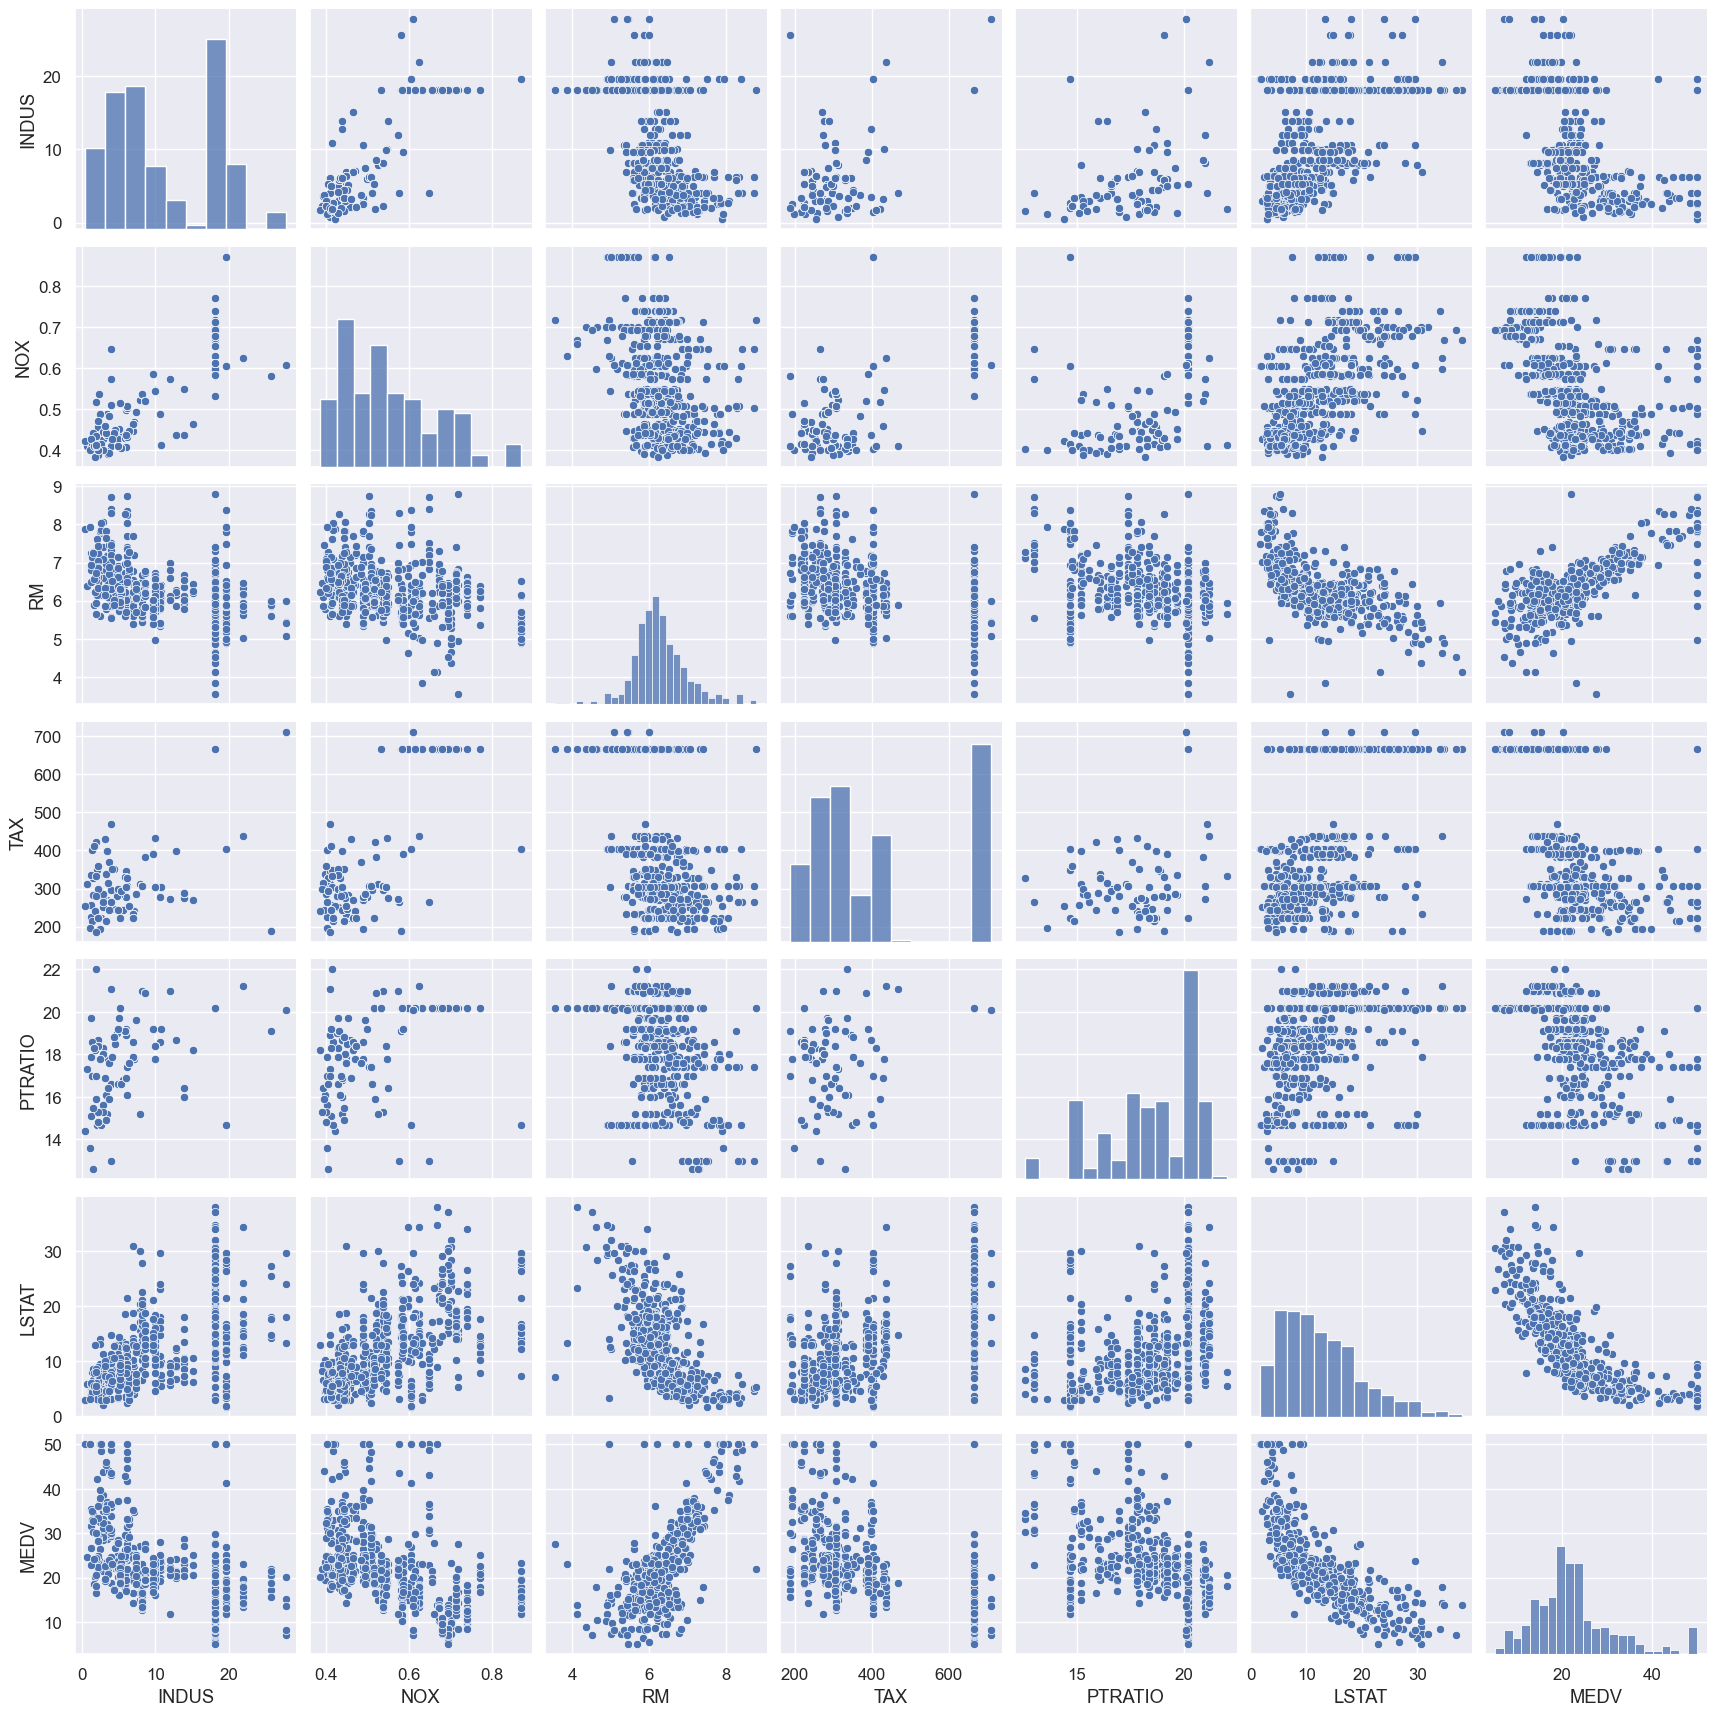

In [41]:
cols = ['INDUS','NOX','RM','TAX','PTRATIO','LSTAT','MEDV']

sns.pairplot(data[cols])


In [42]:
X = data.drop('MEDV', axis=1)
y = data['MEDV'].values
 
for i in range(10):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    X1_train = X_train
    X1_test = X_test
    
    X2_train = X_train.loc[:,['LSTAT', 'RM', 'PTRATIO', 'INDUS','TAX','NOX']]
    X2_test  = X_test.loc[:,['LSTAT', 'RM', 'PTRATIO', 'INDUS','TAX','NOX']]
    
    lr1 = LinearRegression(normalize=True)
    lr1.fit(X1_train, y_train)
    score_all_columns = lr1.score(X1_test, y_test)
    y_pred_train_1 = lr1.predict(X1_train)
    y_pred_test_1 = lr1.predict(X1_test)
    
    lr2 = LinearRegression()
    lr2.fit(X2_train, y_train)
    score_selected_columns = lr2.score(X2_test, y_test)
    y_pred_train_2 = lr2.predict(X2_train)
    y_pred_test_2 = lr2.predict(X2_test)
        
    #print(score_all_columns, score_selected_columns)


/Users/aleksandramolenda/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/aleksandramolenda/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

fro

MAE TRAIN 0.48, TEST 0.5
MSE TRAIN 0.45, TEST 0.48
R2  TRAIN 0.53, TEST 0.57


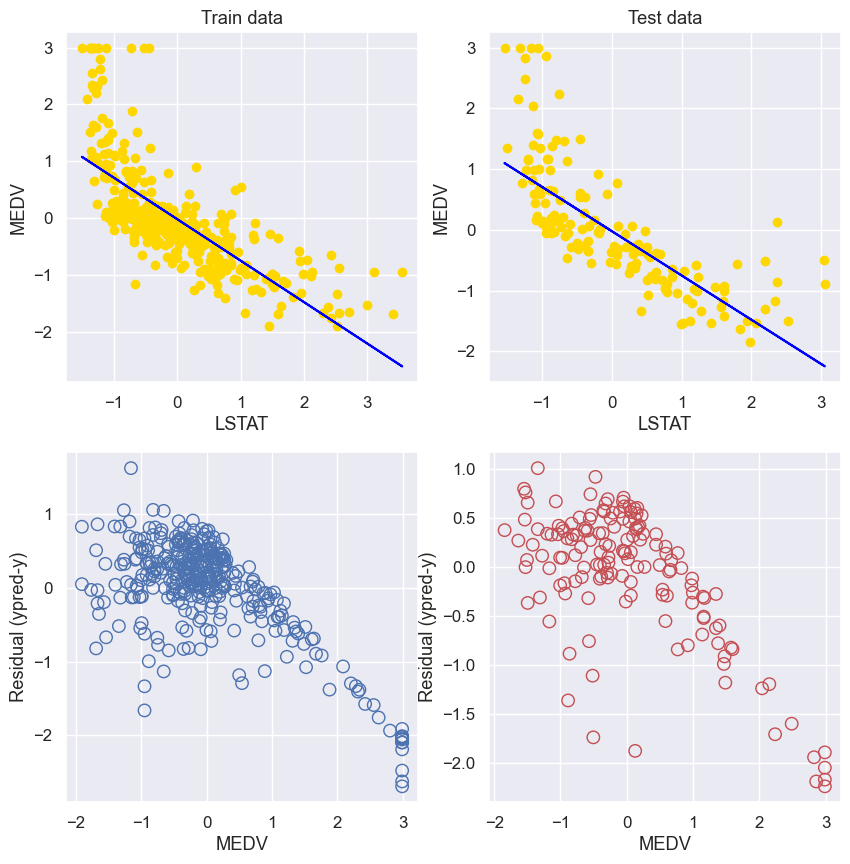

In [44]:
#residual value chart

# detecting outliers with IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
 
## removing outliers
# outlier_condition = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 +1.5 * IQR)))
# data = data[~outlier_condition.any(axis=1)]
 
# prepare for residual plot
X = data['LSTAT'].values.reshape(-1,1)
y = data['MEDV'].values.reshape(-1,1)
 
# plt.figure(figsize=(5,5))
# plt.scatter(X, y)
 
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
 
scaler = StandardScaler()
scaler.fit(y)
y = scaler.transform(y)
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
 
lr = LinearRegression()
lr.fit(X_train, y_train)                

 
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)                

 
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0,0].scatter(X_train, y_train, color = 'gold')
ax[0,0].plot(X_train, y_pred_train, color = 'blue')
ax[0,0].set_title('Train data')
ax[0,0].set_xlabel('LSTAT')
ax[0,0].set_ylabel('MEDV')

 
ax[0,1].scatter(X_test, y_test, color = 'gold')
ax[0,1].plot(X_test, y_pred_test, color = 'blue')
ax[0,1].set_title('Test data')
ax[0,1].set_xlabel('LSTAT')
ax[0,1].set_ylabel('MEDV')

 
ax[1,0].scatter(y_train, y_pred_train - y_train, s=80, 
          facecolors='none', edgecolors='b')
ax[1,0].set_xlabel('MEDV')
ax[1,0].set_ylabel('Residual (ypred-y)')
 
ax[1,1].scatter(y_test,  y_pred_test  - y_test,  s=80, 
          facecolors='none', edgecolors='r')
ax[1,1].set_xlabel('MEDV')
ax[1,1].set_ylabel('Residual (ypred-y)')



# Verifying errors of used linear model
mae_train = mean_absolute_error(y_train, lr.predict(X_train))
mae_test = mean_absolute_error(y_test, lr.predict(X_test))
print(f"MAE TRAIN {round(mae_train,2)}, TEST {round(mae_test,2)}")
 
mse_train = mean_squared_error(y_train, lr.predict(X_train))
mse_test = mean_squared_error(y_test, lr.predict(X_test))
print(f"MSE TRAIN {round(mse_train,2)}, TEST {round(mse_test,2)}")
 
r2_train = r2_score(y_train, lr.predict(X_train))
r2_test = r2_score(y_test, lr.predict(X_test))
print(f"R2  TRAIN {round(r2_train,2)}, TEST {round(r2_test,2)}")